## Prediction of Heart Disease

**Dataset source:** https://archive.ics.uci.edu/ml/datasets/heart+disease

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [2]:
df = pd.read_csv('processed.cleveland.data', header = None, na_values = '?')
display(df.head(5))
print("Dataframe Shape:",df.shape)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Dataframe Shape: (303, 14)


### Naming the columns

In [3]:
df.columns = ['age',     'sex',   'cp',      'trestbps', 'chol', 'fbs',  'restecg', 
              'thalach', 'exang', 'oldpeak', 'slope',    'ca',   'thal', 'hd']
display(df.sample(5))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
75,65.0,0.0,3.0,160.0,360.0,0.0,2.0,151.0,0.0,0.8,1.0,0.0,3.0,0
208,55.0,1.0,2.0,130.0,262.0,0.0,0.0,155.0,0.0,0.0,1.0,0.0,3.0,0
235,54.0,1.0,4.0,122.0,286.0,0.0,2.0,116.0,1.0,3.2,2.0,2.0,3.0,3
89,51.0,0.0,3.0,130.0,256.0,0.0,2.0,149.0,0.0,0.5,1.0,0.0,3.0,0
179,53.0,1.0,3.0,130.0,246.0,1.0,2.0,173.0,0.0,0.0,1.0,3.0,3.0,0


### Column name description

##### 14 columns/ features of the dataset: 

- **age:** age in years 

- **sex:** sex 
> 0 = female <br> 1 = male 

- **cp:** chest pain type <br>
> 1 = typical angina<br> 2 = atypical angina<br> 3 = non-anginal pain<br> 4 = asymptomatic

- **trestbps:** resting blood pressure (in mm Hg on admission to the hospital)
- **chol:** serum cholestoral in mg/dl
- **fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- **restecg:** resting electrocardiographic results
> 0 = normal
<br> 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
<br> 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria

- **thalach:** maximum heart rate achieved
- **exang:** exercise induced angina (1 = yes; 0 = no)
- **oldpeak:** ST depression induced by exercise relative to rest
- **slope:** the slope of the peak exercise ST segment
> <br>1 = upsloping
<br>2 = flat
<br>3 = downsloping

- **ca:** number of major vessels (0-3) colored by flourosopy
- **thal:** 
> 3 = normal; <br>6 = fixed defect; <br>7 = reversable defect
- **hd:** heart disease 

### Column variable's datatype

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  hd        303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


#### Observation
- **4 missing** values in **ca** column
- **2 missing** values in **thal** column

### Dropping the rows with missing values

In [5]:
df = df.dropna()
print(df.shape)

(297, 14)


#### Unique values in 'hd' column

In [6]:
print(df['hd'].value_counts())

0    160
1     54
2     35
3     35
4     13
Name: hd, dtype: int64


#### Converting all values greater 1 to 1

In [7]:
df[df['hd'] > 1] = 1
print(df['hd'].value_counts())

0    160
1    137
Name: hd, dtype: int64


### Setting feature and target variables

In [8]:
X = df.drop('hd', axis = 1)
y = df[['hd']]

print("Features:" ,X.shape)
print("Targets:" ,y.shape)

Features: (297, 13)
Targets: (297, 1)


### One-Hot Encoding

In [9]:
X = pd.get_dummies(X, columns = ['cp', 'restecg', 'slope', 'thal'], drop_first = True)

display(X.head(5))
print(X.shape)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,0,0,0,1,0,1,0,1,0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,1,0,0,0,0,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,0,1,0,1,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,1,0,0,0,1,0,0,1,0,0


(297, 19)


### Splitting train and test dataset

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size = 0.8, 
                                                    random_state = 42, 
                                                    stratify = y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(237, 19) (60, 19) (237, 1) (60, 1)


### Checking stratification
##### Function to check ratio`

In [11]:
def Ratio(a,b):
    class_0 = a['hd'].value_counts().values[0]
    class_1 = a['hd'].value_counts().values[1]

    ratio = class_1/class_0
    print(b,"Ratio: ",ratio)

##### Ratio:

In [12]:
Ratio(y_train,"Training")
Ratio(y_test,"Test")


Training Ratio:  0.8515625
Test Ratio:  0.875


### Instantiating and fitting the model with Decision Tree Classifier

In [13]:
tree_model = DecisionTreeClassifier(random_state = 42)
tree_model = tree_model.fit(X_train, y_train)

In [14]:
y_pred = tree_model.predict(X_test)

#### Comparison of predicted and actual data

In [15]:
y_test['probability'] = np.round(tree_model.predict_proba(X_test)[:,1], 2)
y_test['predicted_hd'] = y_pred

display(y_test.sample(5))

,hd,probability,predicted_hd
200,0,1.0,1
295,0,0.0,0
172,1,1.0,1
90,0,0.0,0
195,1,1.0,1


### Decision Tree Diagram

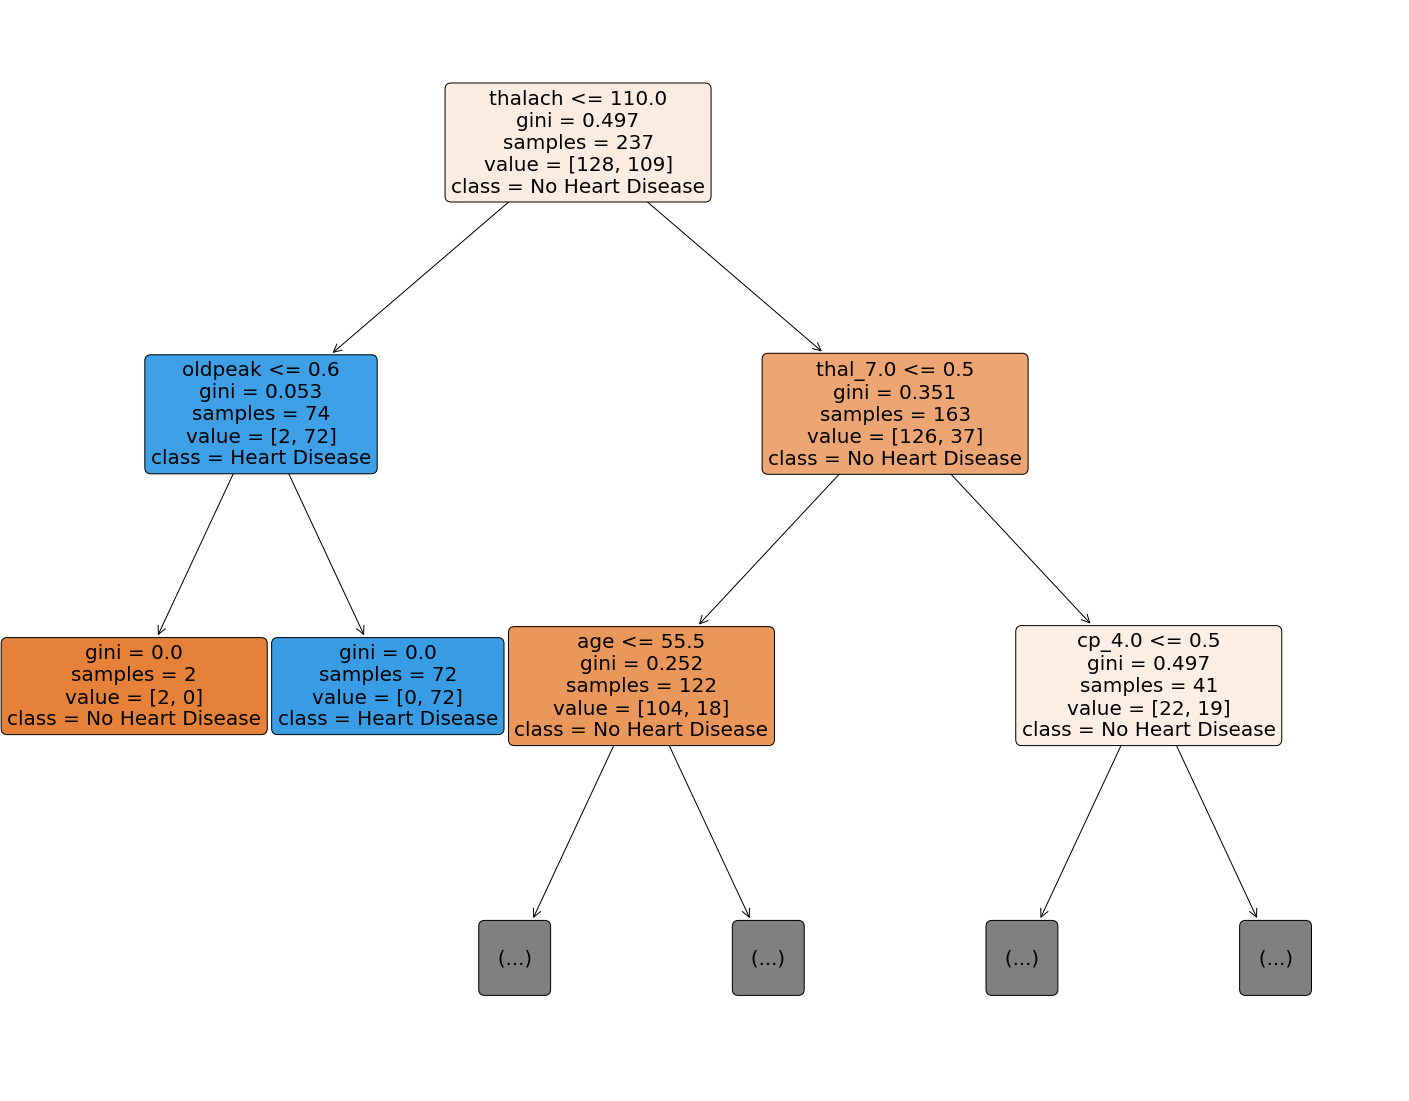

In [16]:
plt.figure(figsize = (25, 20))
plot_tree(tree_model, 
          filled = True,
          rounded = True,
          class_names = ["No Heart Disease", "Heart Disease"],
          feature_names = X.columns,
          max_depth = 2, 
          fontsize = 20)

plt.show()

### Confusion matrix

In [17]:
confusion__matrix = confusion_matrix(y_test['hd'], 
                                     y_test['predicted_hd'])

print('confusion_matrix: \n\n', confusion__matrix)

confusion_matrix: 

 [[26  6]
 [ 5 23]]


### Visualizing Confusion matrix

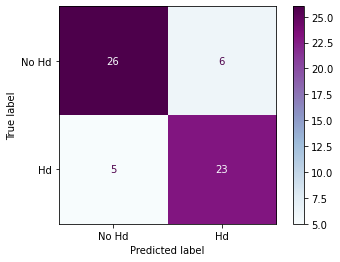

In [18]:
plot_confusion_matrix(tree_model, X_test, y_test['hd'], 
                      display_labels=["No Hd", "Hd"],
                      cmap='BuPu')
plt.show()

#### Observation
- Out of 28 people **with heart disease**, 23 cases were **correctly predicted**, which is **82.14%**
- While 26 people who **idnt have heart disease** were **correctly predicted**, out of 32 people. That is **81.25%**

In [19]:
y_test['hd'].value_counts()

0    32
1    28
Name: hd, dtype: int64

In [20]:
TP = confusion__matrix[1,1]
print("True Positives: ", TP)

TN = confusion__matrix[0,0]
print("True Negatives: ", TN)

FP = confusion__matrix[0,1]
print("False Positives: ", FP)

FN = confusion__matrix[1,0]
print("False Negatives: ", FN)

True Positives:  23
True Negatives:  26
False Positives:  6
False Negatives:  5


#### Observation
- Higher value of true positives and true negatives are desired.
- False negatives and false positives should be lower.

In [21]:
accuracy = accuracy_score(y_test['hd'], y_test['predicted_hd'])

print('Accuracy of the model =',np.round(accuracy*100,2), '%') 

Accuracy of the model = 81.67 %


#### Classification metrices calculation

In [22]:
def measure(m):
    m = m(y_test['hd'], y_test['predicted_hd'])
    return np.round(m*100,2)

In [23]:
print("precision_score: ", measure(precision_score), "%")
print("recall_score: ", measure(recall_score), "%")
print("f1_score: ", measure(f1_score), "%")

precision_score:  79.31 %
recall_score:  82.14 %
f1_score:  80.7 %


- **Precision:**
Precision is the ratio of true positives to the sum of true and false positives.<br>
- **Recall:**
Recall is the ratio of true positives to the sum of true positives and false negatives. <br>
- **F1 score:**
The F1 score is a weighted harmonic mean of precision and recall (varies between 0 to 1).<br>
- **Support:**
Support is the number of actual occurrences of the class in the specified dataset.

#### Classification report

In [24]:
class_report = classification_report(y_test['hd'], y_pred)
print("Classification Report: \n", class_report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.81      0.83        32
           1       0.79      0.82      0.81        28

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



- *Classification report gives the summary layout of the classification metrices*
> The model accuracy is approximately 82%.<br> The precision, recall and f1 scores are around 80%, which is good. But the model sill requires 
improvement

### Receiver Operating Characterisitcs (ROC) and Area Under the Curve (AUC)

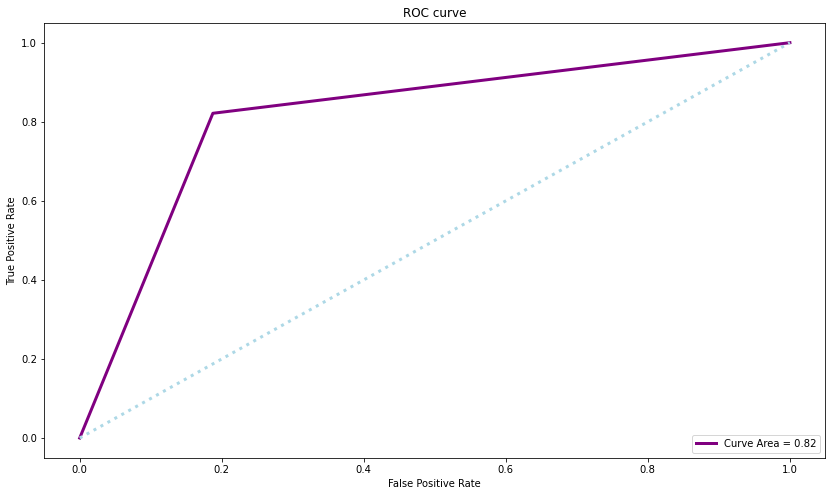

In [25]:
fpr, tpr, thr = roc_curve(y_test['hd'], y_test['predicted_hd'])
auc = np.round(roc_auc_score(y_test['hd'], y_test['predicted_hd']), 2)

plt.figure(figsize = (14, 8))
plt.plot(fpr, tpr, 
         color = 'purple', lw = 3, 
         label = "Curve Area = " + str(auc))

plt.title('ROC curve')
plt.plot([0, 1], [0, 1], color = 'lightblue', lw = 3, linestyle = ':')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.show()

#### Observation
- The AUC is the measure of the ability of a classifier to distinguish between classes.
- The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.
- Here the AUC is .82, which is acceptable but requires improvement.

### Outcome:
**Accuracy, AUC, Classification metrices are all around 80%. The model is needed to be and can be improved.**